# **Air Quality Index(AQI) Prediction**

**Objective**

The main objective of this project is to build a Machine Learning model that predicts the Air Quality Index(AQI) based on environmental factors such as pollutant concentrations (PM2.5, PM10, NO₂, SO₂, CO, O₃, etc.).

Collect real world AQI datasets, Perform data
 preprocessing & visualization, Apply statistical analysis and ML models(Linear Regression, Random Forest, XGBoost, Neural Networks), Evaluate models using metrics like RMSE, MAE, R². - Provide insights and visual dashboards to interpret predictions.

**Problem Statement**

 Air pollution has become one of the biggest environmental concerns globally. Governments and organizations monitor AQI levels daily to warn citizens and make policy decisions. Traditional AQI reporting
 is reactive (based on current sensor readings).
 This project aims to make it predictive — helping anticipate AQI levels ahead of time using machine
 learning, enabling proactive measures.

**About Dataset**

Link: https://www.kaggle.com/datasets/rudravpatel/aqi-data-of-india-2021-2023

This dataset contains historical Air Quality Index (AQI) data for various states and union territories in India from the years 2021 to 2022. The dataset provides insights into the air quality levels in different regions of India during this period, allowing researchers, analysts, and policymakers to study trends, make comparisons, and draw conclusions about air quality.

In [33]:
#import all libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Adding all statewise dataset in a data frame to marge in one file
excel_files = [
    '/content/Assam.xlsx',
    '/content/Bihar.xlsx',
    '/content/Chandigarh.xlsx',
    '/content/Chattisgarh.xlsx',
    '/content/Delhi.xlsx',
    '/content/Gujarat.xlsx',
    '/content/Haryana.xlsx',
    '/content/HimachalPradesh.xlsx',
    '/content/JammuKashmir.xlsx',
    '/content/Jarkhand.xlsx',
    '/content/Karnataka.xlsx',
    '/content/Kerala.xlsx',
    '/content/MadhyaPradesh.xlsx',
    '/content/Maharasthra.xlsx',
    '/content/Meghalaya.xlsx',
    '/content/Nagaland.xlsx',
    '/content/Odisha.xlsx',
    '/content/Punducherry.xlsx',
    '/content/Punjab.xlsx',
    '/content/Rajasthan.xlsx',
    '/content/Sikkim.xlsx',
    '/content/TamilNadu.xlsx',
    '/content/Telangana.xlsx',
    '/content/Tripura.xlsx',
    '/content/Uttarakhand.xlsx',
    '/content/UttarPradesh.xlsx',
    '/content/WestBengal.xlsx',
    '/content/AndhraPradesh.xlsx',
    '/content/ArunachalPradesh.xlsx'
]
print(excel_files)

['/content/Assam.xlsx', '/content/Bihar.xlsx', '/content/Chandigarh.xlsx', '/content/Chattisgarh.xlsx', '/content/Delhi.xlsx', '/content/Gujarat.xlsx', '/content/Haryana.xlsx', '/content/HimachalPradesh.xlsx', '/content/JammuKashmir.xlsx', '/content/Jarkhand.xlsx', '/content/Karnataka.xlsx', '/content/Kerala.xlsx', '/content/MadhyaPradesh.xlsx', '/content/Maharasthra.xlsx', '/content/Meghalaya.xlsx', '/content/Nagaland.xlsx', '/content/Odisha.xlsx', '/content/Punducherry.xlsx', '/content/Punjab.xlsx', '/content/Rajasthan.xlsx', '/content/Sikkim.xlsx', '/content/TamilNadu.xlsx', '/content/Telangana.xlsx', '/content/Tripura.xlsx', '/content/Uttarakhand.xlsx', '/content/UttarPradesh.xlsx', '/content/WestBengal.xlsx', '/content/AndhraPradesh.xlsx', '/content/ArunachalPradesh.xlsx']


In [3]:
#Marge in one file
dataframes = []
for file in excel_files:
    data = pd.read_excel(file)
    dataframes.append(data)

df = pd.concat(dataframes, ignore_index=True)

In [4]:
#First look of data
print(df.head())

          From Date           To Date Ozone  CO  SO2  NO2  PM10  PM2.5  State  \
0  01-08-2021 00:00  02-08-2021 00:00   NaN NaN  NaN  NaN   NaN    NaN  Assam   
1  02-08-2021 00:00  03-08-2021 00:00   NaN NaN  NaN  NaN   NaN    NaN  Assam   
2  03-08-2021 00:00  04-08-2021 00:00   NaN NaN  NaN  NaN   NaN    NaN  Assam   
3  04-08-2021 00:00  05-08-2021 00:00   NaN NaN  NaN  NaN   NaN    NaN  Assam   
4  05-08-2021 00:00  06-08-2021 00:00   NaN NaN  NaN  NaN   NaN    NaN  Assam   

       City                                   Station  
0  Byrnihat  Central Academy for SFS, Byrnihat - PCBA  
1  Byrnihat  Central Academy for SFS, Byrnihat - PCBA  
2  Byrnihat  Central Academy for SFS, Byrnihat - PCBA  
3  Byrnihat  Central Academy for SFS, Byrnihat - PCBA  
4  Byrnihat  Central Academy for SFS, Byrnihat - PCBA  


**Data Preprocessing**

In [5]:
#Checking shape(rows & Column)
print(df.shape)

(292000, 11)


In [6]:
#Checking missing values
print(df.isnull().sum())

From Date        0
To Date          0
Ozone        96531
CO           97317
SO2          94226
NO2          95743
PM10         96405
PM2.5        94780
State            0
City             0
Station          0
dtype: int64


The dataset is too large so its cant effect if I drop the missing value

In [7]:
#Droping missing value
df.dropna(inplace=True)

In [8]:
#Checking douplicate
print(df.duplicated().sum())

571


In [9]:
#Droping douplicate
df.drop_duplicates(inplace=True)

In [10]:
#Checking datatypes
print(df.dtypes)

From Date     object
To Date       object
Ozone         object
CO           float64
SO2           object
NO2          float64
PM10         float64
PM2.5        float64
State         object
City          object
Station       object
dtype: object


In [11]:
#Converting datetime column to date time and numeric column to numeric
df['From Date'] = pd.to_datetime(df['From Date'])
df['To Date'] = pd.to_datetime(df['To Date'])
df['SO2'] = pd.to_numeric(df['SO2'], errors='coerce')
df['Ozone'] = pd.to_numeric(df['Ozone'], errors='coerce')

/tmp/ipython-input-3097682765.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['From Date'] = pd.to_datetime(df['From Date'])
/tmp/ipython-input-3097682765.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['To Date'] = pd.to_datetime(df['To Date'])


In [12]:
#Checking dtype
print(df.dtypes)

From Date    datetime64[ns]
To Date      datetime64[ns]
Ozone               float64
CO                  float64
SO2                 float64
NO2                 float64
PM10                float64
PM2.5               float64
State                object
City                 object
Station              object
dtype: object


In [13]:
#Checking missng & douplicate again
print(df.isnull().sum())
print(df.duplicated().sum())

From Date    0
To Date      0
Ozone        0
CO           0
SO2          1
NO2          0
PM10         0
PM2.5        0
State        0
City         0
Station      0
dtype: int64
0


In [14]:
#Drop that one missing value
df.dropna(inplace=True)

In [15]:
#Checking again
df.isnull().sum()

,0
From Date,0
To Date,0
Ozone,0
CO,0
SO2,0
NO2,0
PM10,0
PM2.5,0
State,0
City,0


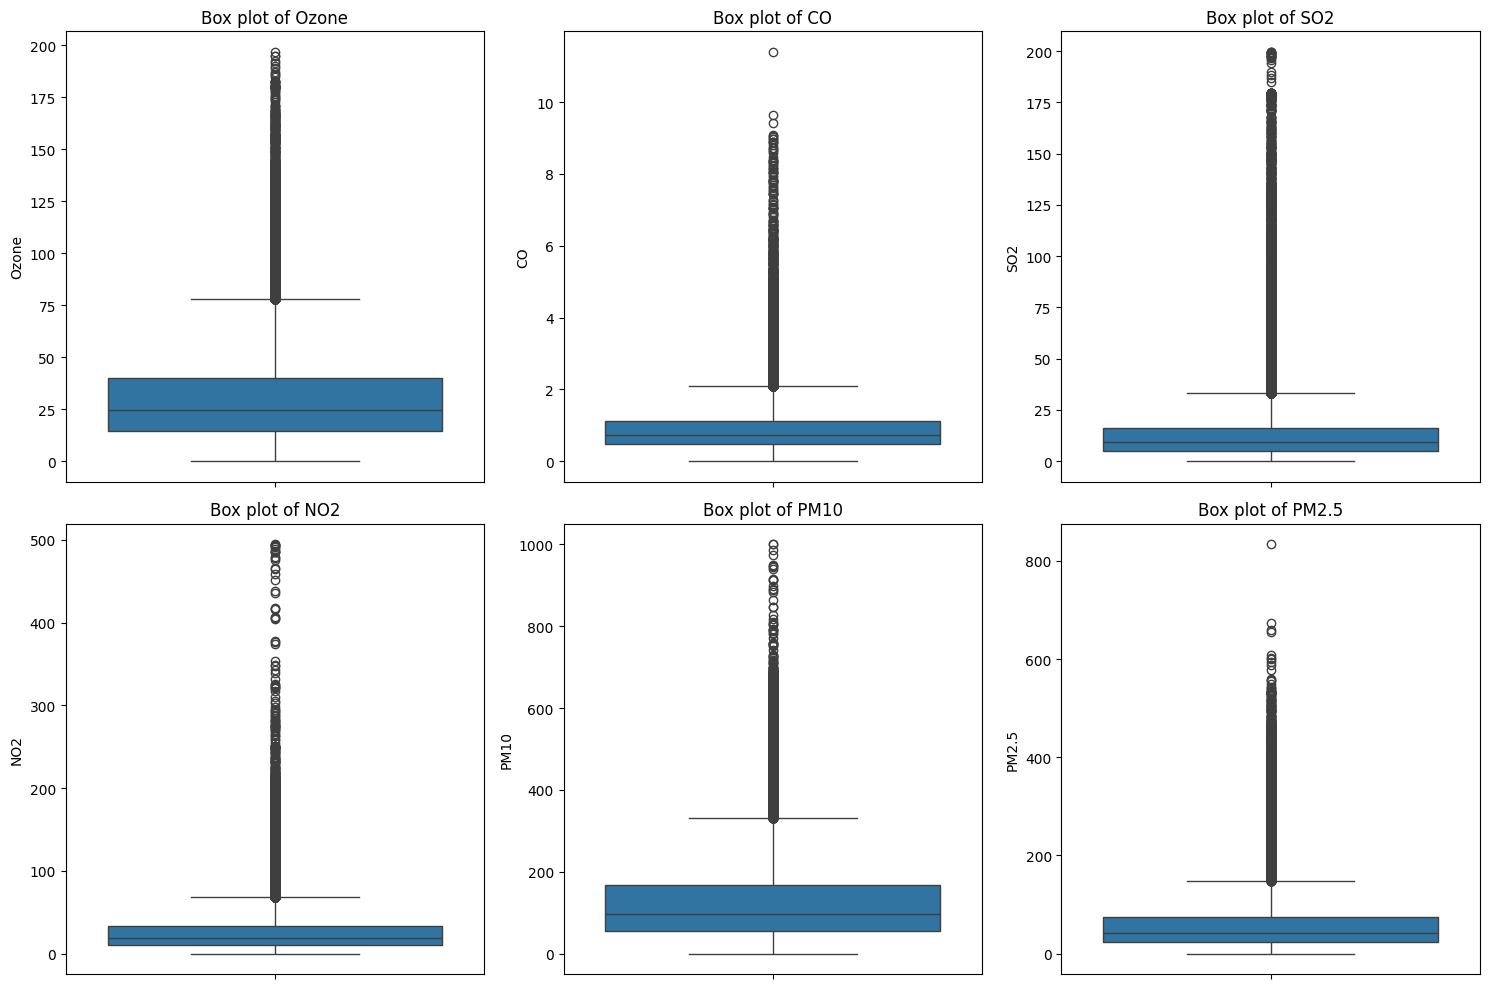

In [16]:
#Checking outlier
# Select numerical columns
numerical_cols = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

**Exploratory Data Analysis**

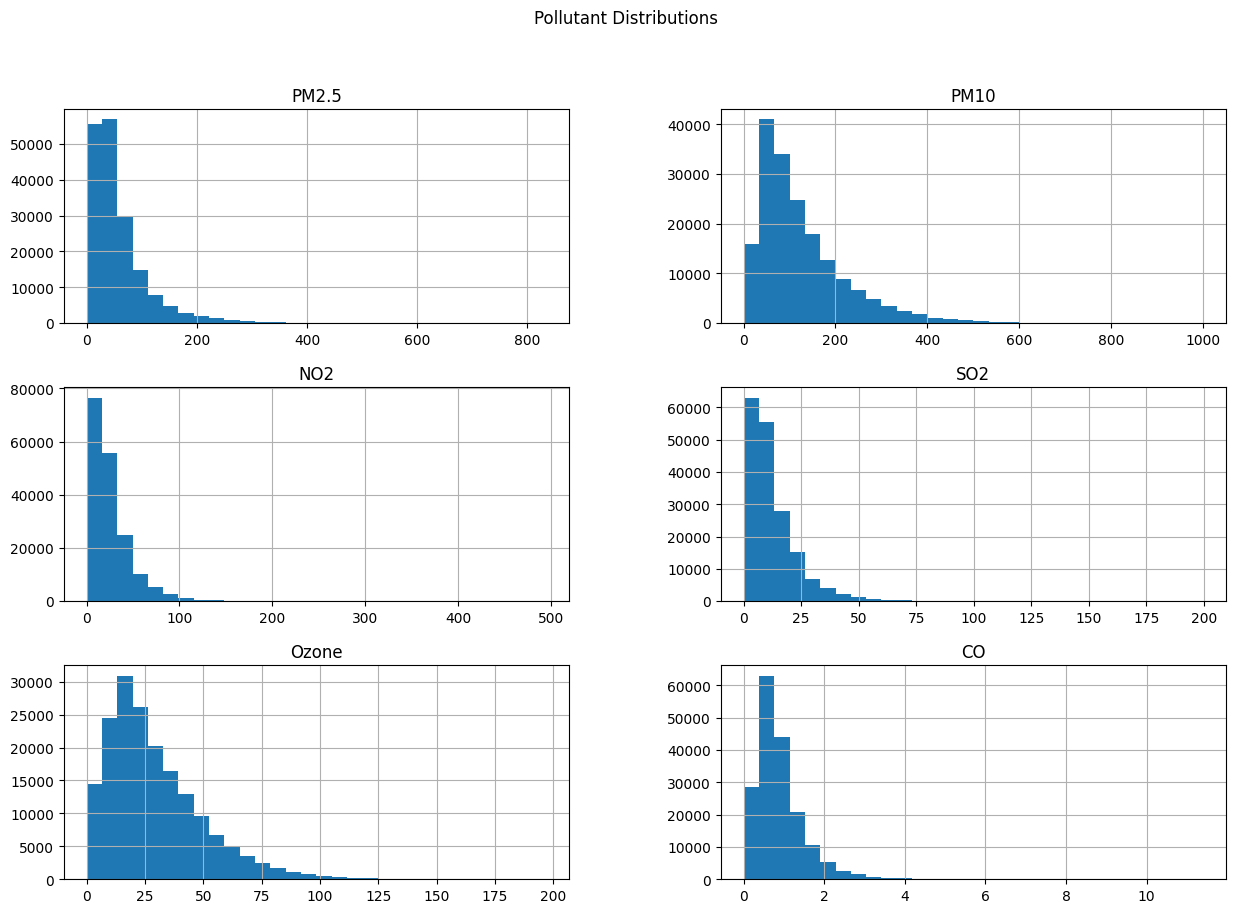

In [17]:
# Distribution plots for major pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'Ozone', 'CO']

df[pollutants].hist(bins=30, figsize=(15, 10))
plt.suptitle("Pollutant Distributions")
plt.show()

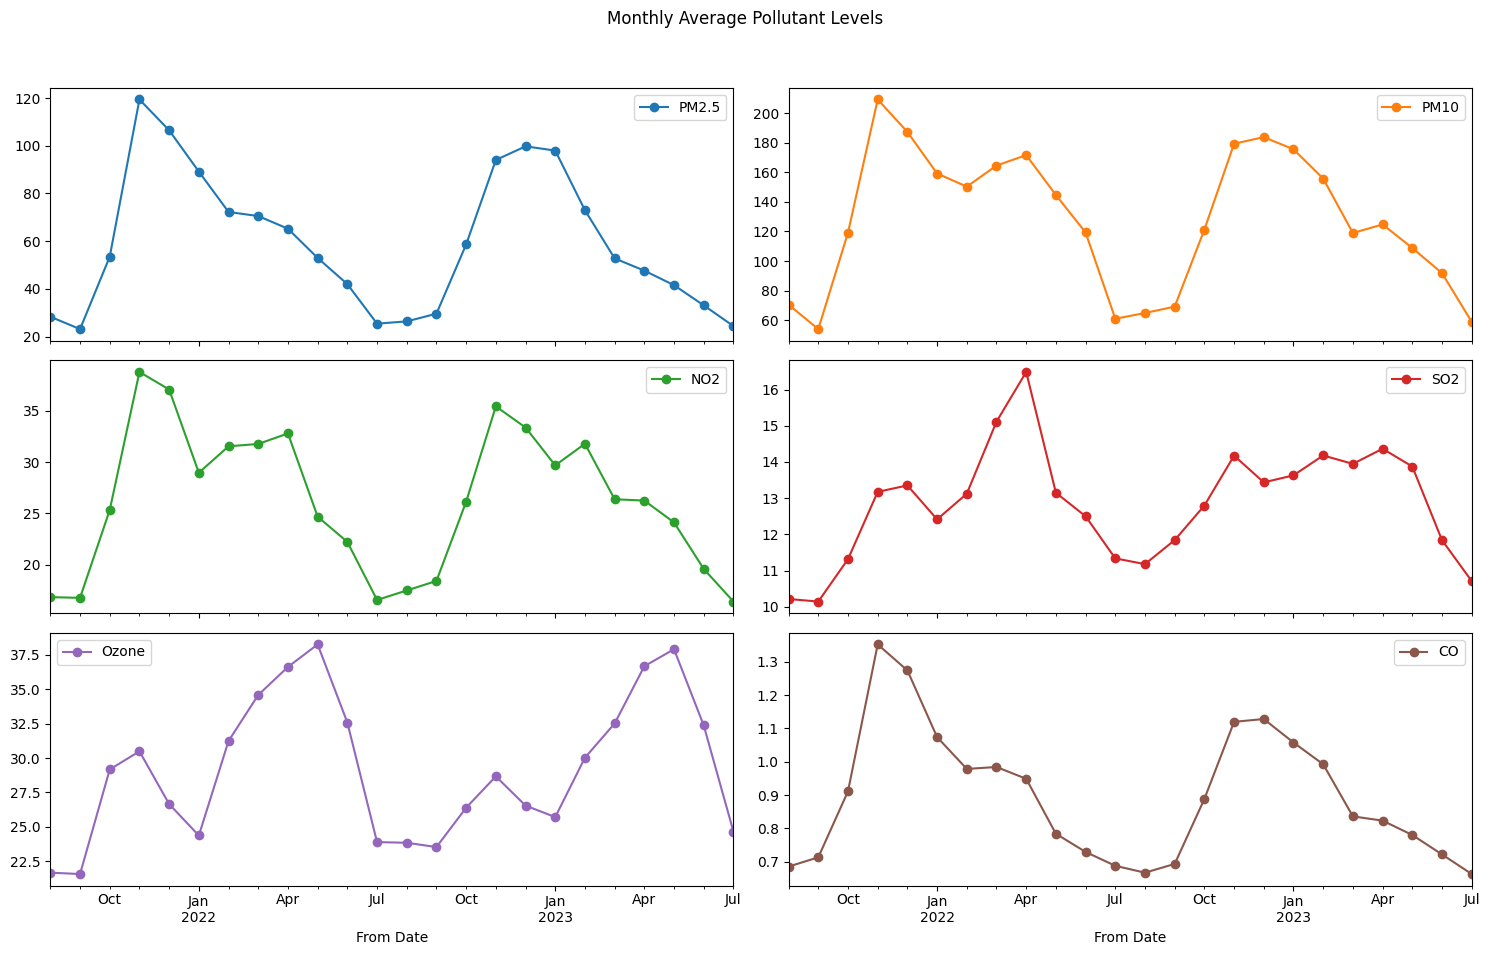

In [18]:
# Monthly average pollutant levels
monthly_trends = df.groupby(df['From Date'].dt.to_period('M'))[pollutants].mean()

# Plotting monthly average pollutant levels
monthly_trends.plot(figsize=(15, 10), subplots=True, layout=(3, 2), marker='o', linestyle='-')
plt.suptitle("Monthly Average Pollutant Levels")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
# Compute average pollutant levels by State
state_pollution = df.groupby('State')[pollutants].mean().sort_values('PM2.5', ascending=False)

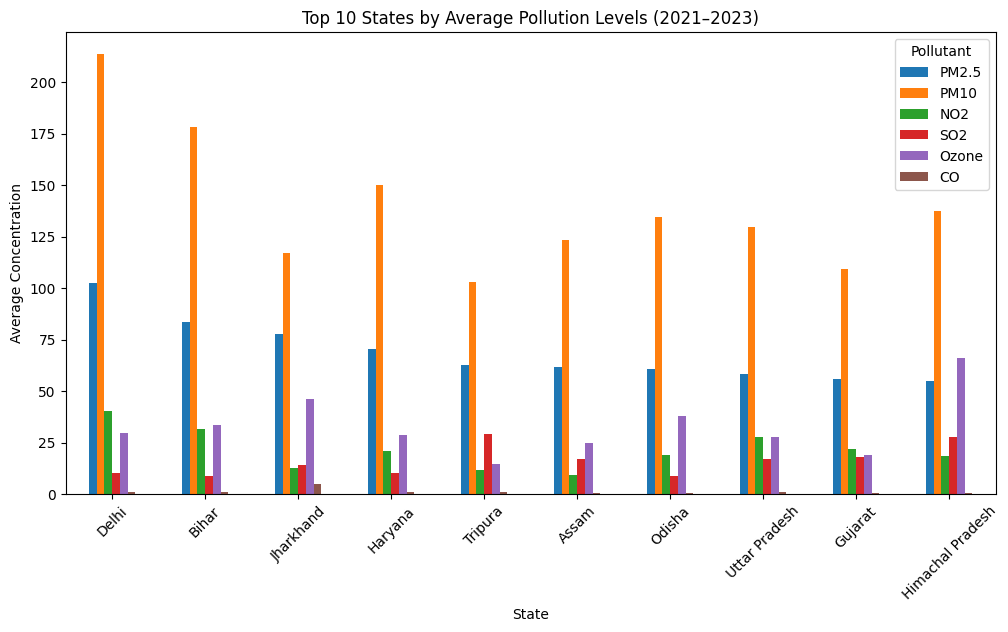

In [20]:
# Plot top 10 states with highest PM2.5 (indicator of worst air quality)
top_states = state_pollution.head(10)

top_states.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 States by Average Pollution Levels (2021–2023)")
plt.ylabel("Average Concentration")
plt.xticks(rotation=45)
plt.legend(title="Pollutant")
plt.show()

In [21]:
# Compute average pollutant levels by City
city_pollution = df.groupby('City')[pollutants].mean().sort_values('PM2.5', ascending=False)

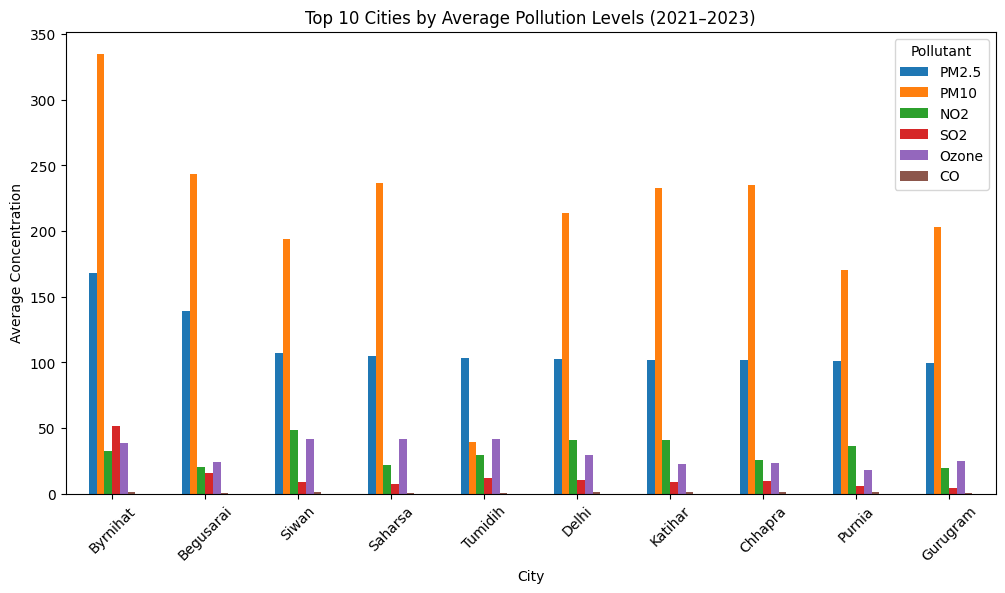

In [22]:
# Plot top 10 cities with worst PM2.5
top_cities = city_pollution.head(10)

top_cities.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Cities by Average Pollution Levels (2021–2023)")
plt.ylabel("Average Concentration")
plt.xticks(rotation=45)
plt.legend(title="Pollutant")
plt.show()

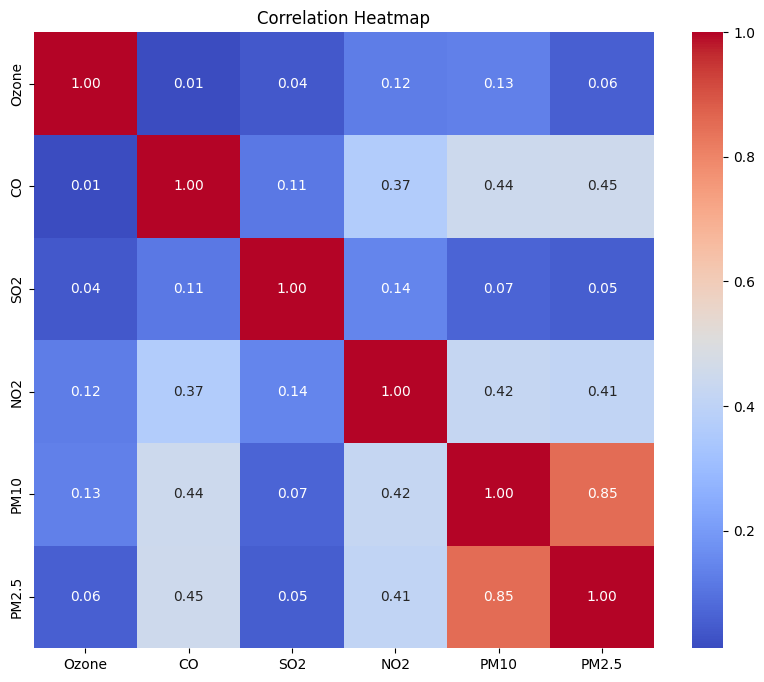

In [23]:
#Checking Corellations for numeric features
numeric_columns = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [24]:
#Check stats
print(df.describe())

                           From Date                        To Date  \
count                         178283                         178283   
mean   2022-09-05 15:19:34.786154496  2022-09-06 15:17:46.017960192   
min              2021-08-01 00:00:00            2021-08-02 00:00:00   
25%              2022-03-08 00:00:00            2022-03-09 00:00:00   
50%              2022-09-25 00:00:00            2022-09-26 00:00:00   
75%              2023-03-14 00:00:00            2023-03-15 00:00:00   
max              2023-07-31 00:00:00            2023-07-31 23:26:00   
std                              NaN                            NaN   

               Ozone             CO            SO2            NO2  \
count  178283.000000  178283.000000  178283.000000  178283.000000   
mean       29.375103       0.887097      12.878605      25.949315   
min         0.010000       0.000000       0.010000       0.010000   
25%        14.395000       0.470000       5.170000      10.450000   
50%        24.4

**Summery From EDA**

* PM10 and PM2.5 are consistently high, indicating chronic air quality issues across cities.

* Large standard deviations in pollutants suggest strong variability (daily & regional).

* Extreme outliers in NO₂, PM10, and PM2.5 highlight potential episodic pollution events.

**Outlier Handle**

The dataset has heavy-tailed distributions (especially PM2.5, PM10, NO₂). Outliers can skew models like Linear Regression.
Best practice: Winsorization (clipping extreme values) at 1st and 99th percentiles.

In [25]:
# List of pollutant columns
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']

# Winsorization (clip at 1st and 99th percentile)
for col in pollutants:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

df[pollutants].describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone
count,178283.000000,178283.000000,178283.000000,178283.000000,178283.000000,178283.000000
mean,57.820675,125.394378,25.530376,12.555064,0.877897,29.179017
std,50.550443,93.304426,21.724956,10.878268,0.583333,20.075732
min,5.450000,14.430000,1.030000,0.770000,0.040000,1.410000
25%,23.820000,56.605000,10.450000,5.170000,0.470000,14.395000
50%,41.830000,98.100000,19.270000,9.310000,0.740000,24.410000
75%,73.820000,166.820000,33.700000,16.410000,1.120000,39.800000
max,269.091800,457.643600,115.143600,59.920000,3.140000,96.590000


**Feature Engineering**



In [26]:
# Extract date-time based features
df['From Date'] = pd.to_datetime(df['From Date'])
df['Year'] = df['From Date'].dt.year
df['Month'] = df['From Date'].dt.month
df['Day'] = df['From Date'].dt.day

*Encoding Categorical Features*:


In [27]:
# Label encode categorical columns (State and City)
label_encoder_state = LabelEncoder()
df['State_encoded'] = label_encoder_state.fit_transform(df['State'])

label_encoder_city = LabelEncoder()
df['City_encoded'] = label_encoder_city.fit_transform(df['City'])

In [28]:
# Drop unnecessary columns (including Station)
df = df.drop(['To Date', 'Station'], axis=1)

In [29]:
# Label encode categorical columns (State and City)
label_encoder_state = LabelEncoder()
df['State_encoded'] = label_encoder_state.fit_transform(df['State'])

label_encoder_city = LabelEncoder()
df['City_encoded'] = label_encoder_city.fit_transform(df['City'])

In [30]:
# dropping missing values with mean
df = df.drop(['State', 'City'], axis=1)

In [31]:

# Calculate AQI if not present (using the formula from previous steps)
breakpoints = {
    'PM2.5': [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, np.inf, 401, 500)],
    'PM10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200), (251, 350, 201, 300), (351, 430, 301, 400), (431, np.inf, 401, 500)],
    'NO2': [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), (181, 280, 201, 300), (281, 400, 301, 400), (401, np.inf, 401, 500)],
    'O3': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300), (209, 748, 301, 400), (749, np.inf, 401, 500)],
    'CO': [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, np.inf, 401, 500)],
    'SO2': [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200), (381, 800, 201, 300), (801, 1600, 301, 400), (1601, np.inf, 401, 500)]
}

def calculate_sub_index(c, pollutant):
    for blo, bhi, ilo, ihi in breakpoints[pollutant]:
        if blo <= c <= bhi:
            return ((ihi - ilo) / (bhi - blo)) * (c - blo) + ilo
    return 0

def calculate_aqi(ozone, co, so2, no2, pm10, pm25):
    sub_indices = {
        'O3': calculate_sub_index(ozone, 'O3'),
        'CO': calculate_sub_index(co, 'CO'),
        'SO2': calculate_sub_index(so2, 'SO2'),
        'NO2': calculate_sub_index(no2, 'NO2'),
        'PM10': calculate_sub_index(pm10, 'PM10'),
        'PM2.5': calculate_sub_index(pm25, 'PM2.5')
    }
    return max(sub_indices.values())

# Compute AQI for each row
df['AQI'] = df.apply(lambda row: calculate_aqi(row['Ozone'], row['CO'], row['SO2'], row['NO2'], row['PM10'], row['PM2.5']), axis=1)

**Model Implimentation**

In [34]:
# Features and targets
features = ['Year', 'Month', 'Day', 'State_encoded', 'City_encoded']
targets = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5', 'AQI']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Split data (y_train and y_test will be multi-output)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df[targets], test_size=0.2, random_state=42)


In [35]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr, multioutput='raw_values'))
r2_lr = r2_score(y_test, y_pred_lr, multioutput='variance_weighted')
print(f'Linear Regression: MAE={mae_lr:.2f}, RMSE={np.mean(rmse_lr):.2f}, R2={r2_lr:.2f}')

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf, multioutput='raw_values'))
r2_rf = r2_score(y_test, y_pred_rf, multioutput='variance_weighted')
print(f'Random Forest: MAE={mae_rf:.2f}, RMSE={np.mean(rmse_rf):.2f}, R2={r2_rf:.2f}')

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb, multioutput='raw_values'))
r2_xgb = r2_score(y_test, y_pred_xgb, multioutput='variance_weighted')
print(f'XGBoost: MAE={mae_xgb:.2f}, RMSE={np.mean(rmse_xgb):.2f}, R2={r2_xgb:.2f}')

Linear Regression: MAE=31.00, RMSE=40.77, R2=0.05
Random Forest: MAE=13.00, RMSE=20.42, R2=0.80
XGBoost: MAE=15.37, RMSE=22.15, R2=0.74


**Comparison:**

Linear Regression: MAE=31.00, RMSE=40.77, R²=0.05

Poor performance with a low R² (0.05), suggesting it explains only 5% of the variance. High MAE and RMSE indicate large average errors.


Random Forest: MAE=13.00, RMSE=20.42, R²=0.80

Strong performance with an R² of 0.80, explaining 80% of the variance. Lower MAE and RMSE show better accuracy and reduced error magnitude.


XGBoost: MAE=15.37, RMSE=22.15, R²=0.74

Good performance with an R² of 0.74, explaining 74% of the variance. MAE and RMSE are higher than Random Forest but still significantly better than Linear Regression.




Conclusion: Random Forest outperforms both Linear Regression and XGBoost, offering the best balance of low error (MAE=13.00, RMSE=20.42) and high explanatory power (R²=0.80). XGBoost is a close second, while Linear Regression is inadequate for this task.

**Plot Predicted vs Actual AQI**

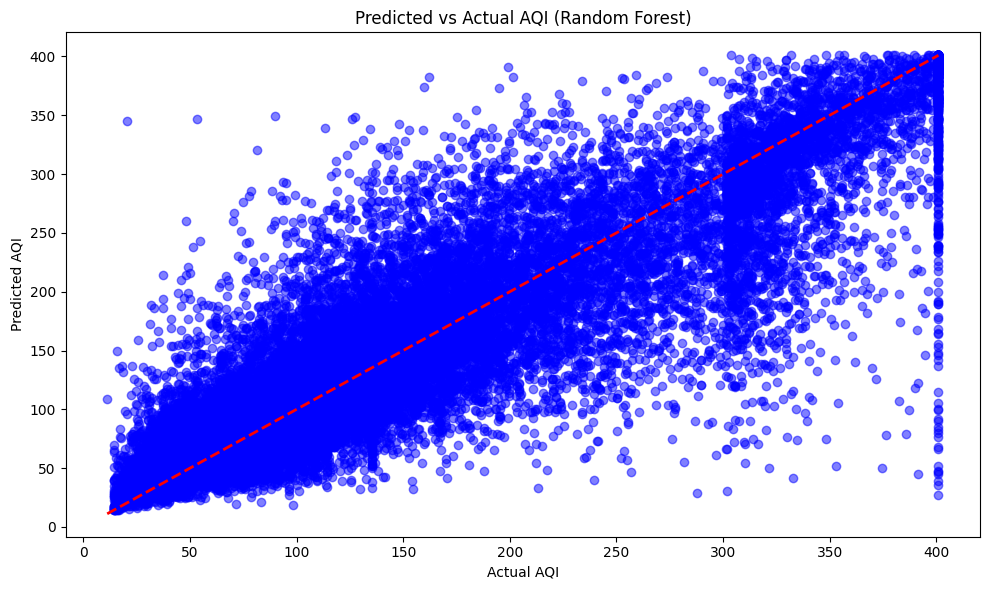

In [36]:
# Assuming y_test and y_pred_rf (from Random Forest, best model) are available
# Extract AQI column (index 6, since targets = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5', 'AQI'])
y_test_aqi = y_test.iloc[:, 6]  # Actual AQI
y_pred_aqi = y_pred_rf[:, 6]    # Predicted AQI from Random Forest

plt.figure(figsize=(10, 6))
plt.scatter(y_test_aqi, y_pred_aqi, color='blue', alpha=0.5)
plt.plot([y_test_aqi.min(), y_test_aqi.max()], [y_test_aqi.min(), y_test_aqi.max()], 'r--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI (Random Forest)')
plt.tight_layout()
plt.show()

**Time-Series Forecast Graphs**

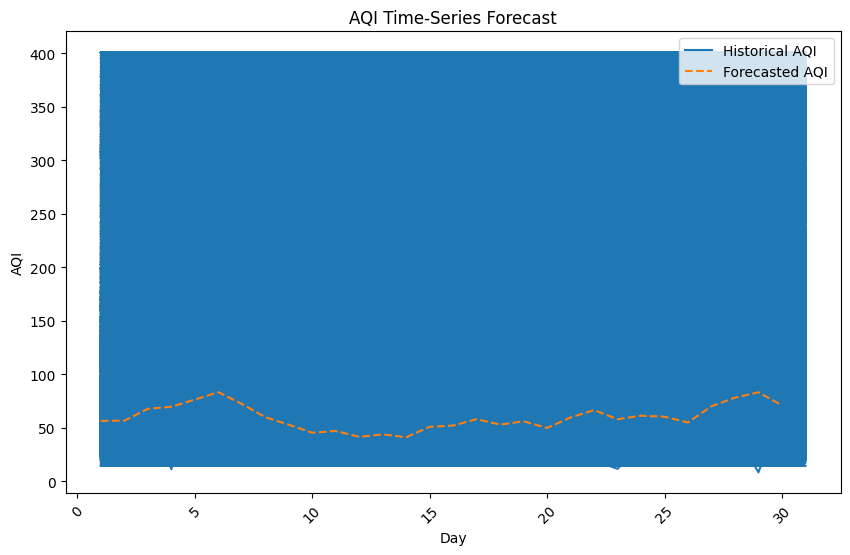

In [37]:
from datetime import timedelta

# Predict future AQI (next 30 days)
last_date = pd.to_datetime(df['From Date']).max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]
future_df = pd.DataFrame({
    'Year': [d.year for d in future_dates],
    'Month': [d.month for d in future_dates],
    'Day': [d.day for d in future_dates],
    'State_encoded': [df['State_encoded'].mode()[0]] * 30,
    'City_encoded': [df['City_encoded'].mode()[0]] * 30
})
future_scaled = scaler.transform(future_df)
future_aqi = rf.predict(future_scaled)[:, 6]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['AQI'], label='Historical AQI')
plt.plot([d.day for d in future_dates], future_aqi, label='Forecasted AQI', linestyle='--')
plt.xlabel('Day')
plt.ylabel('AQI')
plt.title('AQI Time-Series Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [38]:
# Save Random Forest model (run this once after training)
import joblib

joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [39]:
# Encode state and city (using mode as placeholder; replace with saved encoders if available)
state_encoded = df['State_encoded'].mode()[0]  # Use mode as placeholder
city_encoded = df['City_encoded'].mode()[0]   # Use mode as placeholder


In [40]:
# Save scaler, and encoders
joblib.dump(scaler, "scaler.pkl")
joblib.dump(state_encoded, "state_encoder.pkl")
joblib.dump(city_encoded, "city_encoder.pkl")


['city_encoder.pkl']

In [41]:
import joblib
from datetime import datetime
# Load the saved model
rf = joblib.load('random_forest_model.pkl')

# User input for prediction (using your example inputs)
date_input = input("Enter date (YYYY-MM-DD): ")
state_input = input("Enter state: ")
city_input = input("Enter city: ")

# Convert date to datetime
date = datetime.strptime(date_input, '%Y-%m-%d')
Year, Month, Day = date.year, date.month, date.day


# Prepare input data (match column names to DataFrame)
input_data = pd.DataFrame({
    'Year': [Year],
    'Month': [Month],
    'Day': [Day],
    'State_encoded': [state_encoded],
    'City_encoded': [city_encoded]
})

# Scale input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(input_data)  # Fit on input data; adjust if scaler was saved

# Predict
prediction = rf.predict(X_scaled)
aqi_pred = prediction[0, 6]  # AQI is index 6
targets = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5', 'AQI']
# Output result
# Output all predictions
print(f"\nPredictions for {date_input} in {city_input}, {state_input}:")
for target, value in zip(targets, prediction[0]):
    print(f"{target}: {value:.2f}")
print(f"Predicted AQI for {date_input} in {city_input}, {state_input}: {aqi_pred:.2f}")

Enter date (YYYY-MM-DD): 2025-08-20
Enter state: West Bengal
Enter city: Kolkata

Predictions for 2025-08-20 in Kolkata, West Bengal:
Ozone: 33.82
CO: 0.70
SO2: 11.91
NO2: 23.80
PM10: 63.54
PM2.5: 20.32
AQI: 63.74
Predicted AQI for 2025-08-20 in Kolkata, West Bengal: 63.74
